In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.optimize

In [72]:
epsilon = 0.1; D = 0.6; L=np.pi*2
M = 4.712388980384694

In [73]:
def RHS_integrator_3rd_order(y):
    dydt = np.zeros_like(y)
    eta = y[0]
    xi = y[-1]
    dydt[0] = y[1]
    dydt[1] = y[2]
    dydt[2] = 1/epsilon**2*(3*Q/y[0]**3+3*c/y[0]**2-1-D*y[1])
    dydt[-1] = eta
    return dydt

In [74]:
x = np.linspace(-L, L, 300)
eta_0 = 0.3447847624004631
y_left = np.array([eta_0, 0,0, 0])
x_span = (-L,L)
def F(unknowns):
    c = unknowns[0] 
    Q = unknowns[1]
    def RHS_integrator_3rd_order(x,y):
        dydt = np.zeros_like(y)
        eta = y[0]
        xi = y[-1]
        dydt[0] = y[1]
        dydt[1] = y[2]
        dydt[2] = 1/epsilon**2*(3*Q/y[0]**3+3*c/y[0]**2-1-D*y[1])
        dydt[-1] = eta
        return dydt

    solution = scipy.integrate.solve_ivp(RHS_integrator_3rd_order, x_span, y_left, 'BDF', atol = 1e-3, t_eval = x)
    y = solution.y
    eta = y[0,:]
    xi = y[-1, :]
    #plt.plot(x, eta)
    return np.array([eta[-1]-eta[0], xi[-1]-M])

F([0.25, 1.5])

array([ 3828001.78480094, 15097716.21477579])

True
Residual: 46260.2
[-3.13518727 14.35945069]
46269.158241199424


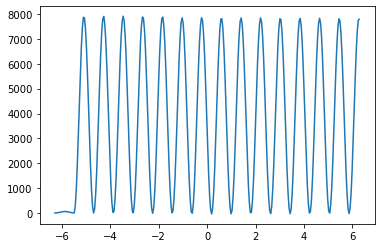

In [79]:
vec_guess = np.array([0.2,10])
sol = scipy.optimize.root(F,  vec_guess, method='lm')
vec_sol = sol.x
print(sol.success)
print('Residual: %g' % abs(F(sol.x)).max())
print(vec_sol)
c = vec_sol[0]
Q = vec_sol[1]
def RHS_integrator_3rd_order(x,y):
        dydt = np.zeros_like(y)
        eta = y[0]
        xi = y[-1]
        dydt[0] = y[1]
        dydt[1] = y[2]
        dydt[2] = 1/epsilon**2*(3*Q/y[0]**3+3*c/y[0]**2-1-D*y[1])
        dydt[-1] = eta
        return dydt
solution = scipy.integrate.solve_ivp(RHS_integrator_3rd_order, x_span, y_left, 'BDF', atol = 1e-3, t_eval = x)
y = solution.y
eta = y[0,:]
plt.plot(x,eta)
print(np.trapz(eta,x))

In [76]:
F(vec_sol)

array([ 8565.47582597, 51261.85330435])

In [80]:
# new shooting method